# Starvation Period Analysis & Prediction In Pakistan

## Problem Statement
Starvation has been one of the major problems the world is tackling with right now, much of the food is wasted or is mismanaged in ways that are not fully discovered by the human beings, so in order to mitigate starvation in any country, we first need to look upon different factors that affect the starvation growth in a country.

## Purpose
The project has been proposed to discover different factors that are involved in the starvation growth in Pakistan, and dataset is collected to identify the factors using different data analysis techniques in visual form and also have the ability to predict/generate datasets for upcoming years as well.

## Target Levels
The target levels chosen for this project is the public, mostly the dataset is focused around collecting variables that target lower middle class and people who are below par the poverty lines, because mostly these groups of people face starvation.

## Tools Used
Tools that have been utilized are listed below:
- Anaconda: Python Environment to access many useful resources
- Python: Programming language of choice
- Jupyter Notebook: To run code and document side by side
- VS Code: IDE for intellisense and workflow
- Matplotlib: Draw/plot Graphs
- Numpy: Math library
- Pandas: Data handling/manipulating library
- Seaborn: Advanced graphs
- Prophet by Facebook: Data prediction model trained by Facebook utilizes Date and the dataset to determine trend
- PyQT5: For application development
- Sklearn: Simple and efficient tools for predictive data analysis
- Scipy: For solving mathematical, scientific, engineering, and technical problems

## Analysis Activities

### 0. Essential Requirements

#### i. Data Collection
Collected data from various sites, references will be provided in the end of this heading, the data collected was not sufficient to perform proper analysis, also data available varied from each variable thus to bridge the gap, I **calculated the mean of the available data and applied random normal distribution around that mean with standard deviation set to 0.1 to generate data that is closer towards reality**, and doesn't affect the overall results of the graphs/conclusion in an unacceptable way.

Data References:
[Macro Trends](https://www.macrotrends.net/countries/PAK/pakistan), 
[Index Mundi](https://www.indexmundi.com/agriculture/?country=pk&graph=production),
[WFP](https://www.wfpusa.org/countries/pakistan/)


#### ii. Necessary setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Variables
dataSkipped = pd.read_csv(r'./Project-Dataset.csv', skiprows=range(1,41))
dataWhole = pd.read_csv(r'./Project-Dataset.csv')

# Setting plot size
plt.rcParams['figure.figsize'] = 13, 5

# Basic configuration for multiple-bar chart
n=len(dataSkipped)
r = np.arange(n)
width = 0.2

#### iii. Data Description
A summary of data used in this project

In [3]:
cols = set(dataWhole.columns) - {'Year'}
dataWhole[list(cols)].describe()

,Population Growth Rate,Rice Production Growth Rate,Meat Production Growth Rate,Wheat Exports Growth Rate,Economic Annual Change,Barley Production Growth Rate,Barley Imports Growth Rate,Rice Imports Growth Rate,Meat Consumption Growth Rate,Wheat Consumption Growth Rate,...,Inflation Rate,Meat Imports Growth Rate,Poverty Annual Change,Barley Consumption Growth Rate,Unemployment Per Year,Rice Exports Growth Rate,Meat Exports Growth Rate,Imports Percent of GDP,GDP Growth Rate,Poverty Percent Under US $5.50 Per Day
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.026706,0.044299,0.241676,0.553569,0.049035,-0.006661,0.763554,-0.087816,0.337979,0.031077,...,0.078781,0.029487,-0.015297,0.002032,0.014312,0.063716,0.305000,0.188342,0.050199,0.814227
std,0.004184,0.116020,1.468353,1.618501,0.025279,0.119128,0.648777,0.243222,0.212904,0.060499,...,0.052468,0.369699,0.081532,0.172894,0.009754,0.270312,1.500950,0.093605,0.023913,0.109083
min,0.019500,-0.299300,-2.988839,-1.000000,0.003070,-0.296600,-1.000000,-1.000000,0.007300,-0.181300,...,-0.005200,-1.000000,-0.188355,-0.248600,0.004000,-0.359900,-5.179421,0.086500,0.004700,0.567878
25%,0.023200,-0.023825,-0.367413,0.000000,0.035425,-0.070400,0.769929,-0.149124,0.033425,0.007125,...,0.044475,-0.073874,-0.052823,-0.105200,0.006300,-0.114275,-0.299725,0.148225,0.036554,0.744022
50%,0.027050,0.028650,0.033550,0.349961,0.049600,-0.019300,1.008771,-0.100554,0.396440,0.029200,...,0.071750,0.025207,-0.009737,-0.014100,0.013861,0.042600,0.328650,0.185750,0.049600,0.819402
75%,0.029325,0.101900,1.135071,0.536134,0.065025,0.064525,1.112434,-0.021053,0.513166,0.056700,...,0.100900,0.116202,0.026831,0.077125,0.015207,0.156600,1.021205,0.203950,0.065025,0.898120
max,0.034200,0.355600,3.403601,11.000000,0.113500,0.339000,2.000000,1.000000,0.647309,0.204500,...,0.266600,2.333300,0.233440,0.909100,0.046500,1.000000,3.727918,0.857723,0.113500,1.042474


### 1. Analysis for consumption, production and starvation
In this comparison we are utilizing multiple-line bar chart which contains 4 variables:

1. Consumption
2. Production
3. Hunger
4. Year

The first 2 variables combine data of food materials such as wheat, rice, barley and meat which are commonly utilized by every citizen in Pakistan.


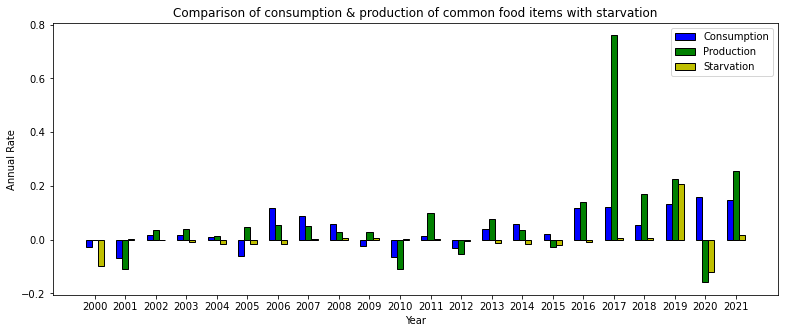

In [4]:
plt.bar(r, (dataSkipped["Wheat Consumption Growth Rate"] + dataSkipped["Barley Consumption Growth Rate"] + dataSkipped["Meat Consumption Growth Rate"] + dataSkipped["Rice Consumption Growth Rate"] )/4, color = 'b',
        width = width, edgecolor = 'black',
        label='Consumption')

plt.bar(r+width, (dataSkipped["Wheat Production Growth Rate"] + dataSkipped["Barley Production Growth Rate"] + dataSkipped["Meat Production Growth Rate"] + dataSkipped["Rice Production Growth Rate"] )/4, color = 'g',
        width = width, edgecolor = 'black',
        label='Production')

plt.bar(r+width*2, dataSkipped["Hunger Annual Change"], color = 'y',
        width = width, edgecolor = 'black',
        label='Starvation')


plt.xlabel("Year")
plt.ylabel("Annual Rate")
plt.title("Comparison of consumption & production of common food items with starvation")
plt.xticks(r + width, dataSkipped["Year"])
plt.legend()
  
plt.show()

#### Conclusion
By looking over the chart we can analyze that:
- The production has mostly been more than the consumption in the country, as Pakistan relies more on agriculture, most of its imports consist of technology and exports are mostly composed of agricultural goods.
- When the production drops below negative value, the hunger statistics also drop below negative which implies that if the production of some specific items is higher it is than easily available in the market at cheaper prices which allows the poor people to partake and thus reduce starvation.

### 2. Analysis for imports, exports and starvation

In this analysis we are now comparing the imports and exports of the same above items with starvation, so that we can identify if the trends of imports and exports of these items have a direct impact on the starvation rates in Pakistan.

Variables used here are:
1. Starvation
2. Imports
3. Exports
4. Year

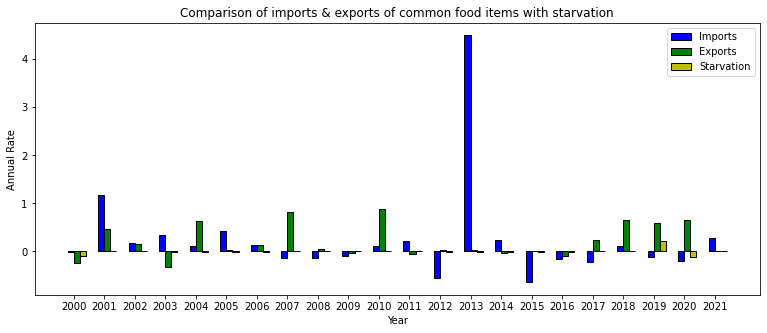

In [5]:
plt.bar(r, (dataSkipped["Wheat Imports Growth Rate"] + dataSkipped["Barley Imports Growth Rate"] + dataSkipped["Meat Imports Growth Rate"] + dataSkipped["Rice Imports Growth Rate"] )/4, color = 'b',
        width = width, edgecolor = 'black',
        label='Imports')

plt.bar(r+width, (dataSkipped["Wheat Exports Growth Rate"] + dataSkipped["Barley Exports Growth Rate"] + dataSkipped["Meat Exports Growth Rate"] + dataSkipped["Rice Exports Growth Rate"] )/4, color = 'g',
        width = width, edgecolor = 'black',
        label='Exports')

plt.bar(r+width*2, dataSkipped["Hunger Annual Change"], color = 'y',
        width = width, edgecolor = 'black',
        label='Starvation')


plt.xlabel("Year")
plt.ylabel("Annual Rate")
plt.xticks(r + width/2, dataSkipped["Year"])
plt.title("Comparison of imports & exports of common food items with starvation")
plt.legend()
  
plt.draw()

#### Conclusion
Upon close analysis of the results, we can find that the export trends of these crops are on a rise. Which means:
- Common food items are mostly accessible for the public
- If these items are more accessible, this means that the items would be sold in low prices
- Imports of these items is generally low as compared to the exports

### 3. Analysis of relationship between starvation & unemployment

In this analysis we are now comparing linear relationship between starvation and unemployment, and proving if the relationship between the two exists or not.
Variables used here are:
1. Unemployment
2. Starvation
3. Year

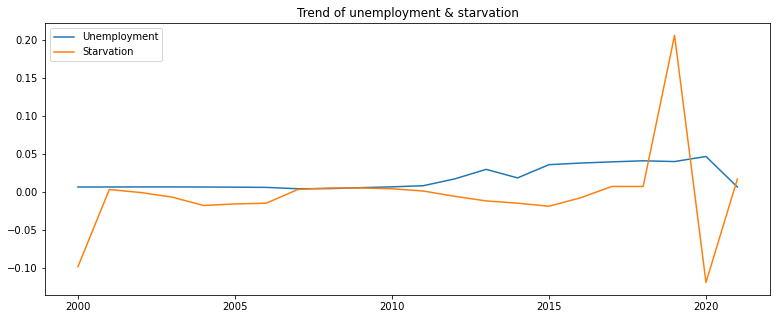

In [6]:
plt.plot(dataSkipped["Year"], dataSkipped["Unemployment Per Year"], label="Unemployment")
plt.plot(dataSkipped["Year"], dataSkipped["Hunger Annual Change"], label="Starvation")
plt.title("Trend of unemployment & starvation")
plt.legend()
plt.show()

seaborn.axisgrid.FacetGrid

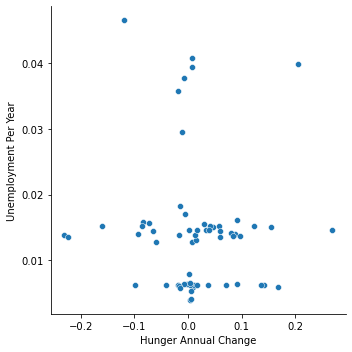

In [7]:
sns.relplot(x="Hunger Annual Change",y="Unemployment Per Year", data=dataWhole)
sns.axisgrid.FacetGrid

#### Conclusion
Upon analysis of the data, we find that the trend mostly remains linear and starvation approaches to unemployment as well, and thus also used the scatter plot to highlight the dependency of starvation on unemployment.
- Unemployment leads to higher starvation rates
- Less earning opportunity, less the chance to provide essential consumption items


### 4. Analysis of relationship between starvation & inflation

In this analysis we are now comparing the starvation and inflation variables, because we want to find out to what degree does inflation affect the starvation rate of a country.

Variables used:
1. Inflation
2. Starvation
3. Year

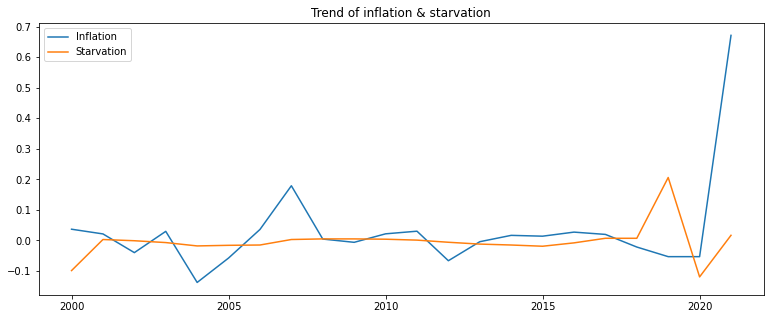

In [8]:
plt.plot(dataSkipped["Year"], dataSkipped["Inflation Annual Change"], label="Inflation")
plt.plot(dataSkipped["Year"], dataSkipped["Hunger Annual Change"], label="Starvation")
plt.title("Trend of inflation & starvation")
plt.legend()
plt.show()

seaborn.axisgrid.FacetGrid

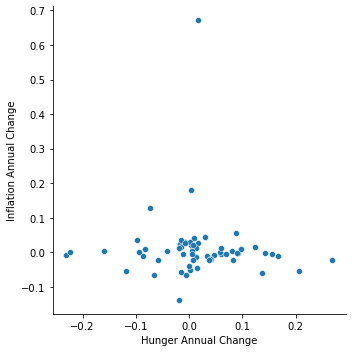

In [9]:
sns.relplot(x="Hunger Annual Change",y="Inflation Annual Change", data=dataWhole)
sns.axisgrid.FacetGrid

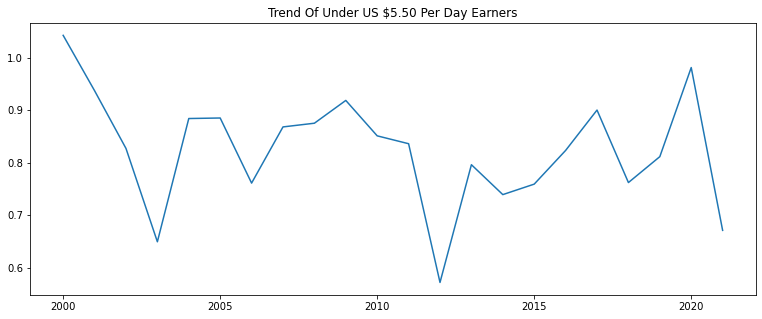

In [10]:
plt.plot(dataSkipped["Year"], dataSkipped["Poverty Percent Under US $5.50 Per Day"], label="Under US $5.50 Per Day Earners")
plt.title("Trend Of Under US $5.50 Per Day Earners")
plt.show()

#### Conclusion
Upon analysis of the data, we find that the trend mostly remains linear and starvation follows inflation, and thus also used the scatter plot to highlight the dependency of starvation on inflation.
- Inflation leads to higher starvation rates
- More inflation means more the cost of the essential items, and less the power of an average consumer to buy them
- Population earning below $5.50 has more chances of starvation, as less buying power and high prices tend to make an impact

### 5. Analysis of Poverty & Starvation

In this analysis we are now comparing the starvation and poverty variables, because we want to investigate the relationship between the two variables.

Variables used:
1. Poverty
2. Starvation
3. Year

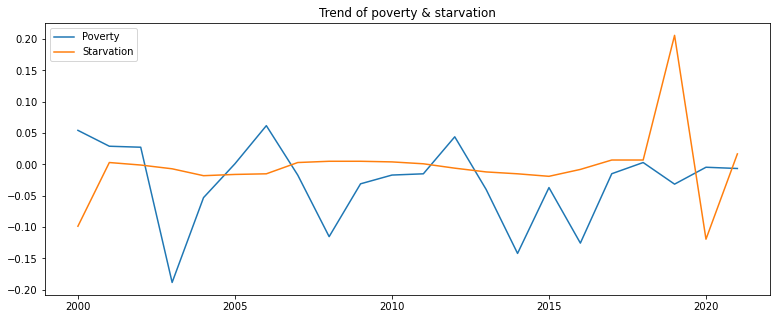

In [11]:
plt.plot(dataSkipped["Year"], dataSkipped["Poverty Annual Change"], label="Poverty")
plt.plot(dataSkipped["Year"], dataSkipped["Hunger Annual Change"], label="Starvation")
plt.title("Trend of poverty & starvation")
plt.legend()
plt.show()

seaborn.axisgrid.FacetGrid

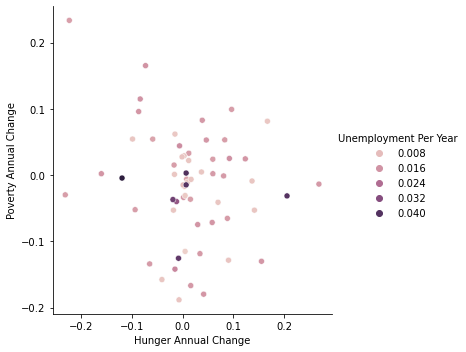

In [12]:
sns.relplot(x="Hunger Annual Change",y="Poverty Annual Change", hue="Unemployment Per Year", data=dataWhole)
sns.axisgrid.FacetGrid

#### Conclusion
Upon analysis of the data, we find that the trend mostly remains linear and starvation follows poverty as well, and thus also used the scatter plot to highlight the dependency of starvation on poverty with unemployment added as hue to emphasize upon the effect density.
- Less power to buy essentials, means more starvation periods in the country
- Poverty is on the highest density when there is unemployment

## Forecasting & Prediction

### 1. Forecasting Food Prices Using Prophet

#### i. Forecasting Wheat Prices In Balochistan

Using prophet wanted to identify the trend of the ongoing prices of essential foods which are common to Pakistani's to predict how starvation is going to be affected till 2023. Specifically have chosen Balochistan province as a candidate for this prediction test.

Variables Used:
1. Food Product
2. Province
3. Date
4. Price

Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


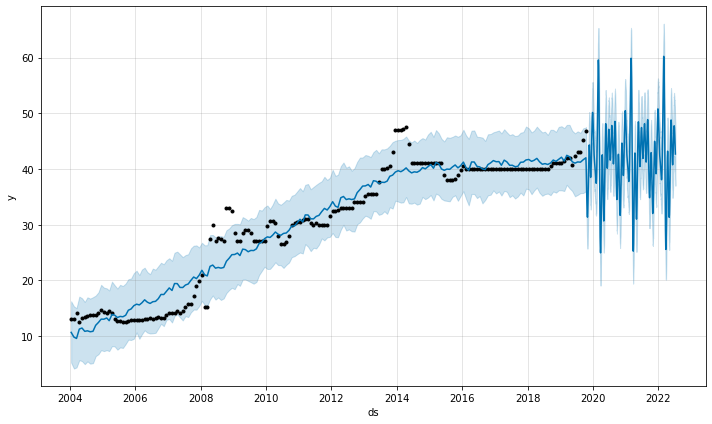

In [13]:
from prophet import Prophet
foodPrices = pd.read_csv(r'./WFP Food Prices In Pakistan.csv')
foodPrices['Date'] = pd.to_datetime(foodPrices['Date'])

wheatBalochistan = foodPrices[(foodPrices['Product'] == 'Wheat flour - Retail') & (foodPrices['Province'] == 'Balochistan')]
wheatBalochistanPrices = wheatBalochistan.groupby('Date').sum()['Price'].reset_index()
wheatBalochistanPrices.columns = ['ds','y']
m = Prophet(interval_width=0.95) 
m.fit(wheatBalochistanPrices) 
future = m.make_future_dataframe(periods = 1000) 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
confirmed_forecast_plot = m.plot(forecast)

##### Conclusion:
Upon analyzing the results we can conclude the prices of wheat in Balochistan are going to rise, wheat an essential food item in Pakistan tends to indicate
- Starvation may rise with the increase of wheat prices in Balochistan if average income doesn't increase.

### 2. Forecasting Starvation Using Regressions

To determine the relationship between starvation and the year

#### 1. Linear Regression:
Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.

Variables used:
1. Starvation
2. Year


The r values is: -0.03170809032360416


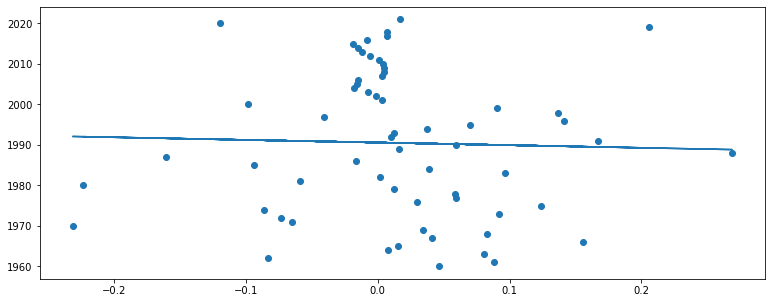

In [14]:
from scipy import stats
x = dataWhole['Hunger Annual Change']
y = dataWhole['Year']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def predictFutureValue(x):
  return slope * x + intercept

model = list(map(predictFutureValue, x))

print('The r values is:', r)

plt.scatter(x, y)
plt.plot(x, model)
plt.show()

#### Conclusion:

- The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
- In linear regression terms the ***r*** is -0.03170809032360416 which indicates the data provided is not suitable

Thus, we shift towards polynomial regression to predict better results.

Note: Any r value that resides around 0 indicates the dataset provided is not suitable for linear regression

#### 2. Polynomial Regression:
Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

Used when a straight line through all data points condition doesn't meet.

R-Squared Value:  0.08830098332986092


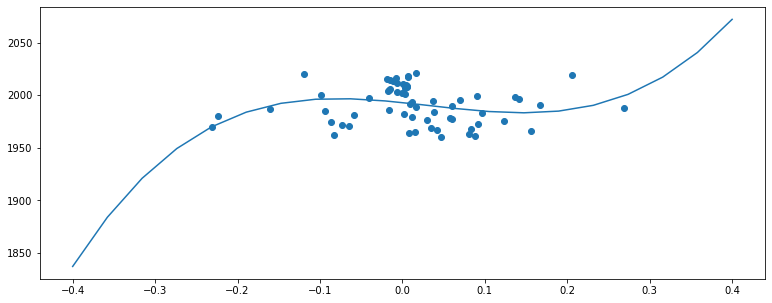

In [16]:
from sklearn.metrics import r2_score

# Predict futre values using the model
model = np.poly1d(np.polyfit(x, y, 3))

line = np.linspace(-0.4, 0.4, 20)

plt.scatter(x, y)
plt.plot(line, model(line))
print("R-Squared Value: ", r2_score(y, model(x)))
plt.show()

#### Conclusion:
R-Squared value is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything. 
- The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.
- Here we find R-Squared value to be 0.08830098332986092 which means a bad relationship

Now moving on to multiple linear regression, so we can add multiple factors to make the results more accurate.

#### 3. Multiple Linear Regression
Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

Variables Used:
- Inflation Annual Change
- Economic Annual Change
- Population Growth Rate Annually
- Unemployment Annual Change
- Poverty Annual Change
- Hunger Annual Change

In [21]:
from sklearn import linear_model

X = dataWhole[['Inflation Annual Change', 'Economic Annual Change', 'Population Growth Rate', 'Poverty Annual Change', 'Unemployment Per Year']]
y = dataWhole['Hunger Annual Change']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedStarvation = regr.predict([[0.12, 0.1,0.21, 0.21,0.1]])
print('The predicted starvation change is:', predictedStarvation)

The predicted starvation change is: [0.27032596]


D:\Softwares\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Conclusion:
Thus as the starvation change per year actual depended on multiple factors, so we had to use multiple linear regression to combine these factors and predict the values which is more accurate and closer to the real world.

- Increased accuracy in the prediction

## Conclusion
In the end we can conclude the document with the hypothesis that the starvation prediction has numerous factors, due to economic crises, population growth of the country just to name a few major ones, starvation trend which was lowering in the past few years has chances to rise again. Unless we take the following precautions:

- Family planning to alter population growth
- Focussing on food literacy
- Preserving agricultural areas
- Improve exports-imports ratio by becoming more independent in producing surplus goods
- Reducing unemployment by expanding the industrial sector, inviting foreign companies etc
- Reducing inflation

## Application Demo

Now presenting some demo pictures of the application made from the conjunction of all these experiments
### 1. Analysis
![Analysis](./Application-Demo-Screenshots/1.png)

### 2. Prediction
![Prediction](./Application-Demo-Screenshots/1.png)

### 3. Edit
![Prediction](./Application-Demo-Screenshots/2.png)